# 2. 구급활동일지 Statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import font_manager, rc
import platform
import seaborn as sns

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    rc('font', family='AppleGothic')

In [2]:
df = pd.read_csv('./data/구급활동일지.csv', encoding='cp949')

### (신고에서 도착까지) 걸린 시간 변수 생성

In [3]:
date1 = df['신고년월일'].str[:10] + ' ' + df['신고시간'].str.strip() + ':00'
date1

0         2018-01-02 3:12:00
1         2018-01-09 8:55:00
2         2018-01-11 8:06:00
3        2018-01-13 15:57:00
4        2018-01-14 14:00:00
                ...         
29650    2020-12-21 16:00:00
29651    2020-12-07 19:59:00
29652    2020-12-30 13:10:00
29653    2020-12-16 16:21:00
29654    2020-12-05 19:28:00
Length: 29655, dtype: object

In [4]:
date2 = df['신고년월일'].str[:10] + ' ' + df['현장도착시간'].str.strip() + ':00'
date2

0         2018-01-02 3:18:00
1         2018-01-09 9:01:00
2         2018-01-11 8:13:00
3        2018-01-13 16:02:00
4        2018-01-14 14:02:00
                ...         
29650    2020-12-21 16:07:00
29651    2020-12-07 20:07:00
29652    2020-12-30 13:16:00
29653    2020-12-16 16:30:00
29654    2020-12-05 19:38:00
Length: 29655, dtype: object

In [5]:
time_interval = pd.to_datetime(date2) - pd.to_datetime(date1)

In [6]:
time_interval

0       0 days 00:06:00
1       0 days 00:06:00
2       0 days 00:07:00
3       0 days 00:05:00
4       0 days 00:02:00
              ...      
29650   0 days 00:07:00
29651   0 days 00:08:00
29652   0 days 00:06:00
29653   0 days 00:09:00
29654   0 days 00:10:00
Length: 29655, dtype: timedelta64[ns]

In [7]:
time_interval = pd.to_timedelta(time_interval).astype('timedelta64[m]').astype(int)
time_interval

0         6
1         6
2         7
3         5
4         2
         ..
29650     7
29651     8
29652     6
29653     9
29654    10
Length: 29655, dtype: int32

00시를 넘어 날짜가 바뀐 경우 : 60분\*24시간=1440분 더함

In [8]:
(time_interval < 0).sum()

94

In [9]:
time_interval.loc[(time_interval < 0)]

108       -20
229     -1432
627     -1433
992     -1433
1071    -1389
         ... 
29077   -1433
29247   -1435
29463   -1435
29495   -1430
29627   -1434
Length: 94, dtype: int32

In [10]:
time_interval.loc[(time_interval < 0)] += 1440
time_interval

0         6
1         6
2         7
3         5
4         2
         ..
29650     7
29651     8
29652     6
29653     9
29654    10
Length: 29655, dtype: int32

In [11]:
df['걸린시간'] = time_interval

### 환자연령이 999인 경우가 있기 때문에, 그 값을 제외

In [12]:
df.describe()

,현장과의거리,환자연령,걸린시간
count,29655.000000,29655.000000,29655.000000
mean,1.865264,67.864879,7.413421
std,1.361086,19.361127,10.321698
min,0.000000,0.000000,0.000000
25%,1.000000,57.000000,5.000000
50%,1.700000,71.000000,7.000000
75%,2.200000,82.000000,8.000000
max,45.000000,999.000000,1420.000000


In [13]:
df = df.loc[df['환자연령'] != 999]
len(df)

29654

## 의미 있는 features만 남기고 모두 지우기
- 현장과의 거리, 걸린 시간, 환자 연령, 환자 성별, 구급처종명

In [14]:
df.columns

Index(['출동소방서', '출동안전센터_지역대', '신고년월일', '신고시간', '접수경로', '관할구분', '출동년월일', '출동시간',
       '현장도착시간', '현장과의거리', '환자연령', '환자성별', '긴급구조구', '긴급구조동', '구급처종명', '환자증상1',
       '환자증상2', '환자증상3', '환자증상4', '환자증상5', '의식상태', '걸린시간'],
      dtype='object')

In [15]:
df = df[['현장과의거리', '걸린시간', '환자연령', '환자성별', '구급처종명']]

## Ordinal Encoding

### 성별

In [16]:
df['환자성별'].replace({'여':0, '남':1}, inplace=True)

### 구급처종명

In [17]:
df['구급처종명'].unique()

array(['집', '의료관련시설', '운동시설', '도로외교통지역', '오락/문화시설', '집단거주시설', '기타',
       '상업시설', '도로', '바다/강/산/논밭', '공장/산업/건설시설', '학교/교육시설', '일차산업장', '가정'],
      dtype=object)

In [18]:
# 집과 가정을 같은 곳으로 취급
df['구급처종명'].replace({'가정':'집'}, inplace=True)
df['구급처종명'].unique()

array(['집', '의료관련시설', '운동시설', '도로외교통지역', '오락/문화시설', '집단거주시설', '기타',
       '상업시설', '도로', '바다/강/산/논밭', '공장/산업/건설시설', '학교/교육시설', '일차산업장'],
      dtype=object)

In [19]:
replacement_dict = dict()
for i, place in enumerate(df['구급처종명'].unique()):
    replacement_dict[place] = i
replacement_dict

{'집': 0,
 '의료관련시설': 1,
 '운동시설': 2,
 '도로외교통지역': 3,
 '오락/문화시설': 4,
 '집단거주시설': 5,
 '기타': 6,
 '상업시설': 7,
 '도로': 8,
 '바다/강/산/논밭': 9,
 '공장/산업/건설시설': 10,
 '학교/교육시설': 11,
 '일차산업장': 12}

In [20]:
df['구급처종명'].replace(replacement_dict, inplace=True)

In [21]:
df.head()

,현장과의거리,걸린시간,환자연령,환자성별,구급처종명
0,2.1,6,62,1,0
1,0.7,6,76,1,0
2,1.5,7,52,1,0
3,1.3,5,65,1,0
4,1.0,2,79,1,0


## 그래프 시각화

### 환자 연령별 환자 수

In [32]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '환자 연령별 환자 수')

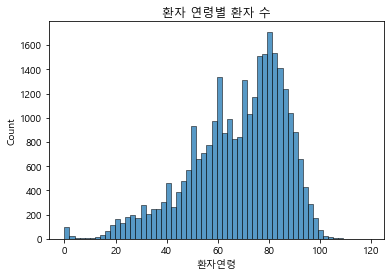

In [37]:
sns_plot = sns.histplot(data=df, x="환자연령", bins=60)
sns_plot.set_title('환자 연령별 환자 수')

<AxesSubplot:xlabel='환자연령', ylabel='Count'>

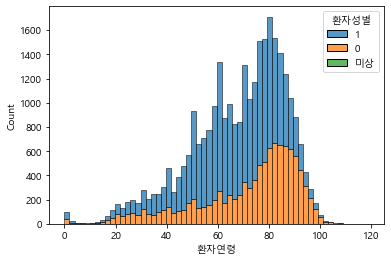

In [39]:
sns.histplot(data=df, x="환자연령", bins=60, hue='환자성별', multiple='stack')

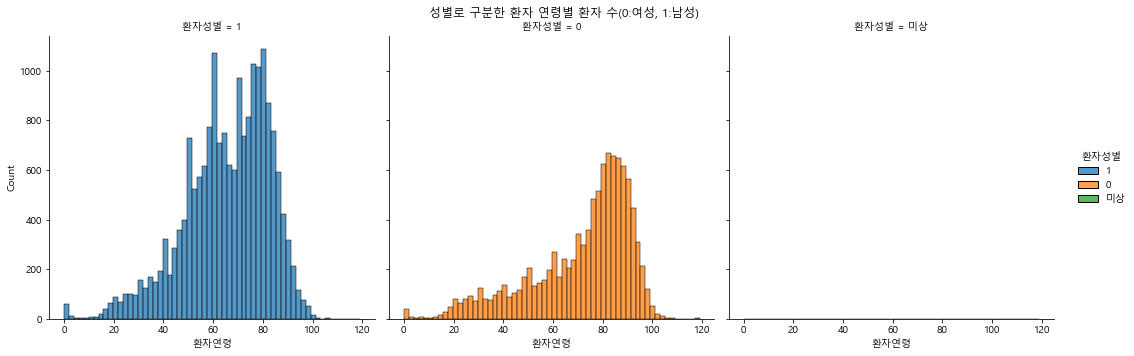

In [40]:
sns_plot = sns.displot(data=df, x="환자연령", bins=60, hue='환자성별', col='환자성별')
sns_plot.fig.subplots_adjust(top=0.9)
sns_plot.fig.suptitle('성별로 구분한 환자 연령별 환자 수(0:여성, 1:남성)')

<AxesSubplot:xlabel='환자연령', ylabel='Count'>

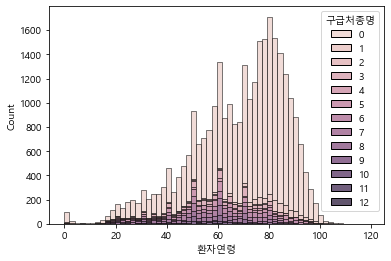

In [42]:
sns.histplot(data=df, x="환자연령", bins=60, hue='구급처종명', multiple='stack')

## Insight 1 : 성별과 연령은 심정지 사고의 중요한 feature이다.

### 구급처종명(장소)별 환자 수

Text(0.5, 1.0, '장소별 환자 수')

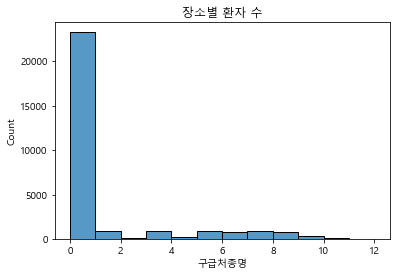

In [43]:
sns_plot = sns.histplot(data=df, x="구급처종명", bins=len(replacement_dict)-1)
sns_plot.set_title('장소별 환자 수')

In [45]:
n_house = (df['구급처종명']==0).sum()
n_other = (df['구급처종명']!=0).sum()

In [46]:
print(f'집에서 발생한 건수 : {n_house}건')
print(f'집 외 다른 장소에서 발생한 건수 : {n_other}건')
print(f'집에서 발생한 비율 : {n_house / (n_house + n_other) * 100:.3f}%')

집에서 발생한 건수 : 23281건
집 외 다른 장소에서 발생한 건수 : 6373건
집에서 발생한 비율 : 78.509%


## Insight 2 : 심정지 사건에 중요한 feature는 주거 인구이다.
- 심정지 사건은 대부분 집에서 발생하기 때문.

### 걸린 시간별 환자 수

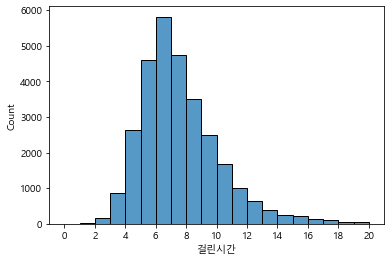

In [50]:
sns.histplot(data=df.loc[df['걸린시간'] <= 20], x="걸린시간", bins=20)
plt.xticks(np.arange(0, 21, 2))
plt.show()

In [51]:
df.describe()

,현장과의거리,걸린시간,환자연령,구급처종명
count,29654.000000,29654.000000,29654.000000,29654.000000
mean,1.865293,7.413401,67.833479,1.151649
std,1.361100,10.321871,18.591027,2.514579
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,57.000000,0.000000
50%,1.700000,7.000000,71.000000,0.000000
75%,2.200000,8.000000,82.000000,0.000000
max,45.000000,1420.000000,119.000000,12.000000


#### 걸린 시간 기준으로 이상치 제거

In [52]:
import matplotlib.pyplot as plt

%matplotlib inline

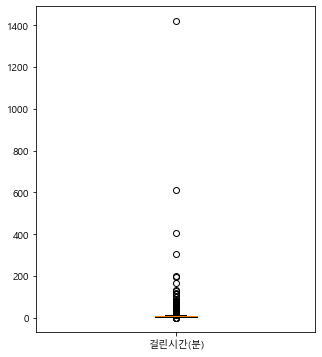

In [53]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(df['걸린시간'], labels=['걸린시간(분)'])

plt.show()

이상치(outlier)
- q1 : 하위 25%
- q3 : 상위 25% (하위 75%)
- IQR : q3-q1
- 이상치의 범위
    - lower bound : q1 - (IQR\*1.5)
    - upper bound : q3 + (IQR\*1.5)
    - (< lower bound) or (> upper bound)

In [55]:
def del_outliter(df, feature):
    q1, q3 = np.percentile(df[feature], [25, 75])
    iqr = q3-q1

    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)

    df = df.loc[(df[feature] <= upper_bound) & (df[feature] >= lower_bound)]
    return df

In [56]:
df = del_outliter(df, '걸린시간')

In [57]:
df.describe()

,현장과의거리,걸린시간,환자연령,구급처종명
count,28180.000000,28180.000000,28180.000000,28180.000000
mean,1.760827,6.765898,67.967991,1.113449
std,0.921109,2.118635,18.543028,2.460088
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,5.000000,57.000000,0.000000
50%,1.600000,6.000000,72.000000,0.000000
75%,2.000000,8.000000,82.000000,0.000000
max,15.000000,12.000000,119.000000,12.000000


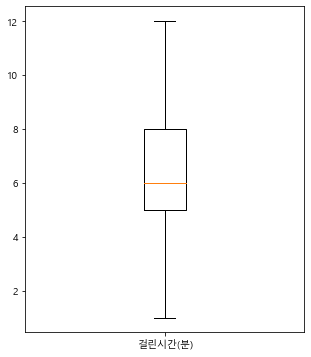

In [58]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(df['걸린시간'], labels=['걸린시간(분)'])
plt.show()

Text(0.5, 1.0, '구조까지 걸린 시간에 따른 환자 수')

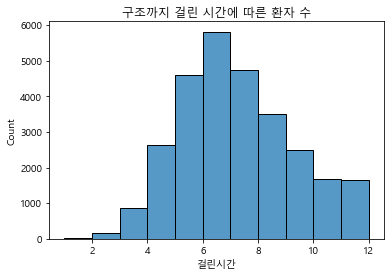

In [65]:
sns_plot = sns.histplot(data=df, x="걸린시간", bins=11)
sns_plot.set_title('구조까지 걸린 시간에 따른 환자 수')

## 현장과의 거리와 걸린 시간 사이의 관계

In [67]:
df.corr()

,현장과의거리,걸린시간,환자연령,구급처종명
현장과의거리,1.000000,0.484818,-0.000527,0.004357
걸린시간,0.484818,1.000000,0.024793,-0.034163
환자연령,-0.000527,0.024793,1.000000,-0.216678
구급처종명,0.004357,-0.034163,-0.216678,1.000000


In [69]:
from scipy import stats
import statsmodels.formula.api as smf

In [71]:
formula = '현장과의거리 ~ 걸린시간' # '설명변수 ~ 반응변수'
result = smf.ols(formula, df).fit() # ols : Ordinary Least Squares(최소제곱법)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 현장과의거리   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     8658.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:51:59   Log-Likelihood:                -33894.
No. Observations:               28180   AIC:                         6.779e+04
Df Residuals:                   28178   BIC:                         6.781e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3347      0.016     20.840      0.000       0.303       0.366
걸린시간           0.2108      0.002     93.050      0.000       0.206       0.215
==============================================================================
Omnibus:                     7760.079   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50402.850
Skew:                           1.165   Prob(JB):                         0.00
Kurtosis:                       9.124   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
x = np.array(df['걸린시간'])
y = np.array(df['현장과의거리'])
p = 1 # 설명변수의 수

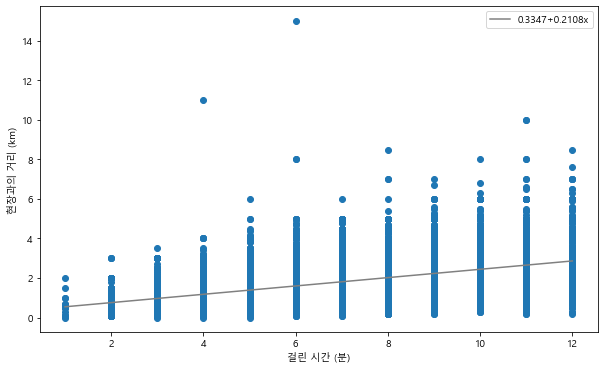

In [74]:
poly_fit = np.polyfit(x, y, 1) # (b1, b0) 반환
poly_1d = np.poly1d(poly_fit) # y=b1x+b0 함수 생성
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('걸린 시간 (분)')
ax.set_ylabel('현장과의 거리 (km)')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.4f}+{poly_fit[0]:.4f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

In [77]:
mins = [3, 4, 5]
distances = poly_1d(mins)

for m, d in zip(mins, distances):
    print(f'{m}분 거리 : {d:.3f}km')

3분 거리 : 0.967km
4분 거리 : 1.178km
5분 거리 : 1.389km


## Insight 3 : 소방서 및 119 안전센터로부터 5분 거리는 약 1km이다.
- 골든 타임 5분 내에 도착하는 것이 중요함
- 직선 거리 1.389km이므로 실제 이동 거리 1km로 가정